In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

d = {'x1': [1, 1.5, 5, 3, 4, 3], 'x2': [1, 1.5, 5, 4, 4, 3.5]}
df = pd.DataFrame(data=d)

print(df)
print(df.shape)

    x1   x2
0  1.0  1.0
1  1.5  1.5
2  5.0  5.0
3  3.0  4.0
4  4.0  4.0
5  3.0  3.5
(6, 2)


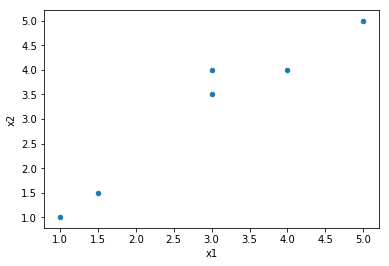

In [3]:
df.plot(kind="scatter", x="x1", y="x2")


In [6]:
def eucDist(i,j):
    ''' returns euclidean distance between pair of points '''
    return math.sqrt(sum((df.loc[i]-df.loc[j])**2))

def calDistMatrix(df,arr):
    ''' calculates proximity/distance matrix between every pair of points '''
    for i in range(len(df)):
        for j in range(len(df)):
            distval = round(eucDist(i,j),2)
            arr[i][j] = distval
def findMin(arr):
    ''' find the min distance between every pair (except x,x pairs) of points'''
    min = arr[0][1]
    ci = 0
    cj = 1
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if i!=j and arr[i][j]<min:
                min = arr[i][j]
                ci = i
                cj = j
    print("min={},i={},j={}".format(min,ci,cj))     
    return min,ci,cj      
        

def agglomerative(arr):
    print(arr)
    noc = len(arr)
    print(noc)

    if noc == 1:
        return
  
    min,ci,cj = findMin(arr)
    
    for row in range(noc):
        arr[row][ci] = np.minimum(arr[row][ci],arr[row][cj]) #using single link distance measure
        del arr[row][cj]
        #print(arr)
    del arr[cj] 
    noc = noc-1
    for i in range(noc):
        for j in range(noc):
            if arr[i][j] != arr[j][i]:
                lmin = np.minimum(arr[i][j],arr[j][i])
                arr[i][j] = lmin
                arr[j][i] = lmin
    agglomerative(arr)
  
  
arr = [[None for p in range(len(df))] for p in range(len(df))] #create an empty array
calDistMatrix(df,arr)  
agglomerative(arr)

      

[[0.0, 0.71, 5.66, 3.61, 4.24, 3.2], [0.71, 0.0, 4.95, 2.92, 3.54, 2.5], [5.66, 4.95, 0.0, 2.24, 1.41, 2.5], [3.61, 2.92, 2.24, 0.0, 1.0, 0.5], [4.24, 3.54, 1.41, 1.0, 0.0, 1.12], [3.2, 2.5, 2.5, 0.5, 1.12, 0.0]]
6
min=0.5,i=3,j=5
[[0.0, 0.71, 5.66, 3.2, 4.24], [0.71, 0.0, 4.95, 2.5, 3.54], [5.66, 4.95, 0.0, 2.24, 1.41], [3.2, 2.5, 2.24, 0.0, 1.0], [4.24, 3.54, 1.41, 1.0, 0.0]]
5
min=0.71,i=0,j=1
[[0.0, 4.95, 2.5, 3.54], [4.95, 0.0, 2.24, 1.41], [2.5, 2.24, 0.0, 1.0], [3.54, 1.41, 1.0, 0.0]]
4
min=1.0,i=2,j=3
[[0.0, 4.95, 2.5], [4.95, 0.0, 1.41], [2.5, 1.41, 0.0]]
3
min=1.41,i=1,j=2
[[0.0, 2.5], [2.5, 0.0]]
2
min=2.5,i=0,j=1
[[0.0]]
1
